# Trabajo Practico Nº2. Ejercicio 3

## Fuzzy Logic con péndulo


### Introduccion

Se plantea realizar un controlador Fuzzy o controlador difuso para controlar el desplazamiento angular de un péndulo invertido. La idea es mantener el pendulo en orientación vertical. Las consignas son las siguientes:
Implementar un sistema de inferencia difusa para controlar un péndulo invertido 
1. Asuma que el carro no tiene espacio restringido para moverse
2. Definir variables lingüísticas de entrada y salida, particiones borrosas, operaciones borrosas para la conjunción, disyunción e implicación, reglas de inferencia (cubrir todas las posibles combinaciones de valores borrosos de entrada en la base de reglas)
3. Utilice el siguiente modelo del sistema carro-péndulo

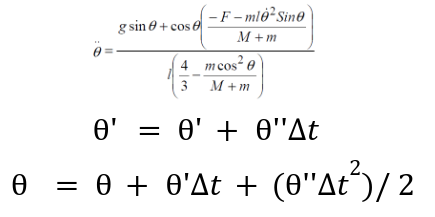 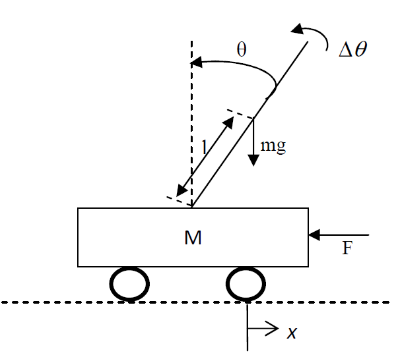


Lo que haremos en primer lugar es importar las librerias necesarias para el desarrollo del ejercicio.

### Importacion de librerias

In [66]:
import matplotlib.pyplot as plt
import numpy as np
from itertools import product #Usado para crear las posibles combinaciones de reglas

### Definicion de variables de entrada, salida y conjuntos difusos

Lo que hacemos primero es crear una funcion que, al pasarle un valor extremo en el que se encuentre el angulo del pendulo y un cierto numero de puntos en los que discretizaremos la funcion de pertenencia, nos devuelva una lista de listas, en el que cada elemento corresponda a una funcion de pertenecia discretizada con el 

In [67]:
#Para ello vamos a crear funcion que me permita asignar una funcion de pertenencia a cada variable

def crearFuncionPertenencia(valorExtremo,valoresAbscisas):
    rango=2*valorExtremo
    numeroConjuntos=5; #Numero de conjuntos difusos. En este caso usaremos NG,NP,Z,PP,PG
    pasoConjunto=rango/(numeroConjuntos-1)
    #Hallamos los picos y los colocamos en una lista
    picos=[-valorExtremo]
    for i in range(1,numeroConjuntos): #Esto se recorrera de 0 a 4, es decir, 5 veces
        picos.append(picos[i-1]+pasoConjunto)

    #Ahora que tenemos los picos, generamos un vector que sera el eje de abcisas de nuestra funcion de pertenencia
    ejeX=valoresAbscisas
    #Ahora generamos las funciones de pertenencia
    #Utilizaremos funciones triangulares y hombro izquierdo y derecho
    
    funcionesPertenencia=[]
    for i in range(numeroConjuntos):
        funcionesPertenencia.append([]) #Agregamos una lista vacia para cada conjunto difuso
    for conjunto in range(numeroConjuntos):
        for valor in ejeX:
            if valor <= picos[conjunto] - pasoConjunto or valor >= picos[conjunto] + pasoConjunto:
                funcionesPertenencia[conjunto].append(0)
            elif picos[conjunto]-pasoConjunto<= valor <= picos[conjunto]:
                funcionesPertenencia[conjunto].append((valor - (picos[conjunto] - pasoConjunto)) / pasoConjunto)
            elif picos[conjunto]<= valor <= picos[conjunto]+pasoConjunto:
                funcionesPertenencia[conjunto].append((picos[conjunto] + pasoConjunto - valor) / pasoConjunto)
            else:
                funcionesPertenencia[conjunto].append(1)

    plt.plot(ejeX,funcionesPertenencia[0])
    plt.plot(ejeX,funcionesPertenencia[1])
    plt.plot(ejeX,funcionesPertenencia[2])
    plt.plot(ejeX,funcionesPertenencia[3])
    plt.plot(ejeX,funcionesPertenencia[4])
    return funcionesPertenencia,picos
    


Ahora generamos las diferentes variables de entrada y salida con sus respectivos conjuntos difusos.

#### Variable de entrada 1: Desplazamiento angular theta

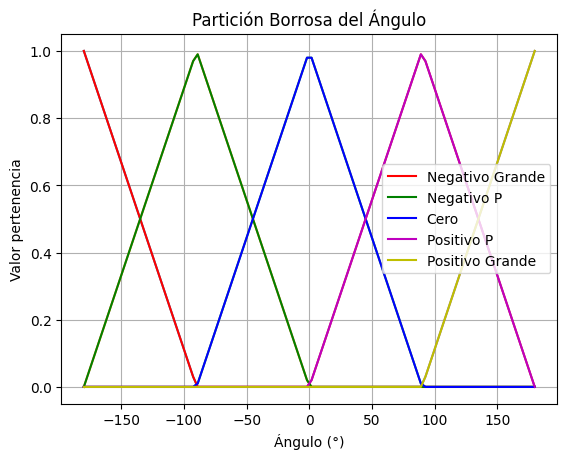

In [68]:
cantidadPuntos=100 #Cantidad de puntos que tendra cada funcion de pertenencia
valorExtremoAngulo=180 #Valor maximo del angulo
angulos=np.linspace(-valorExtremoAngulo,valorExtremoAngulo,cantidadPuntos)
#Obtenemos las respectivas funciones de pertenencia para cada conjunto
funcionesPertenenciaAngulo,picosAngulo=crearFuncionPertenencia(valorExtremoAngulo,angulos)
#Graficamos los conjuntos borrosos
conjuntos = ['Negativo Grande', 'Negativo P','Cero', 'Positivo P', 'Positivo Grande']
colores = ['r', 'g', 'b', 'm', 'y']

for i,funcion in enumerate(funcionesPertenenciaAngulo):
    plt.plot(angulos,funcion,label=conjuntos[i],color=colores[i])

plt.xlabel('Ángulo (°)')
plt.ylabel('Valor pertenencia')
plt.title('Partición Borrosa del Ángulo')
plt.legend()
plt.grid(True)
plt.show()

### Variable de entrada 2: Velocidad angular thetha´

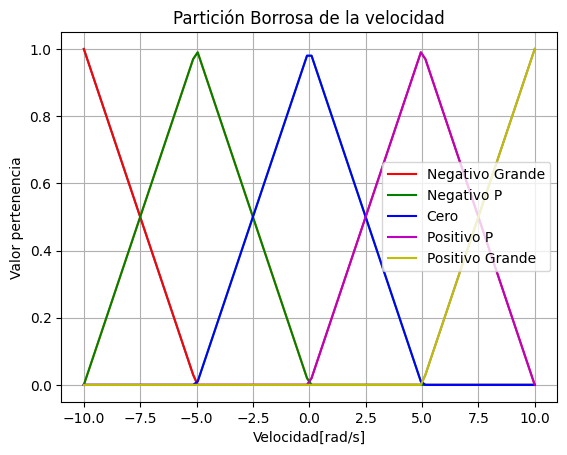

In [69]:
valorExtremoVelocidad=10
#Aca ya no hace falta determinar el numero de puntos porque es el mismo que para el desplazamiento
velocidades=np.linspace(-valorExtremoVelocidad,valorExtremoVelocidad,cantidadPuntos)
#Obtenemos las respectivas funciones de pertenencia para cada conjunto
funcionesPertenenciaVelocidades,picosVelocidad=crearFuncionPertenencia(valorExtremoVelocidad,velocidades)
#Graficamos los conjuntos borrosos
conjuntos = ['Negativo Grande', 'Negativo P','Cero', 'Positivo P', 'Positivo Grande']
colores = ['r', 'g', 'b', 'm', 'y']

for i,funcion in enumerate(funcionesPertenenciaVelocidades):
    plt.plot(velocidades,funcion,label=conjuntos[i],color=colores[i])

plt.xlabel('Velocidad[rad/s]')
plt.ylabel('Valor pertenencia')
plt.title('Partición Borrosa de la velocidad')
plt.legend()
plt.grid(True)
plt.show()

### Variable de Salida: Fuerza

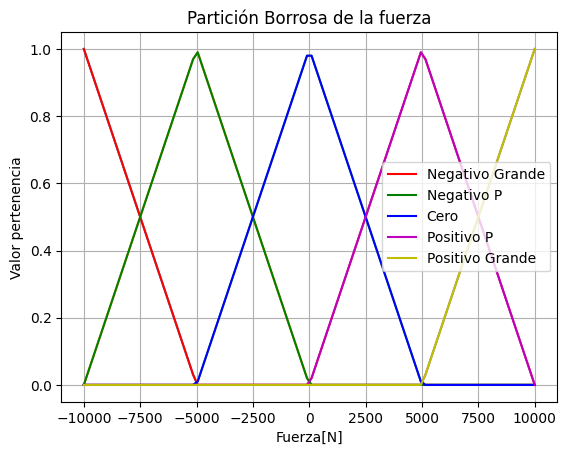

In [70]:
valorExtremoFuerza=10000
#Aca ya no hace falta determinar el numero de puntos porque es el mismo que para el desplazamiento
fuerzas=np.linspace(-valorExtremoFuerza,valorExtremoFuerza,cantidadPuntos)
#Obtenemos las respectivas funciones de pertenencia para cada conjunto
funcionesPertenenciaFuerzas,picosFuerza=crearFuncionPertenencia(valorExtremoFuerza,fuerzas)
#Graficamos los conjuntos borrosos
conjuntos = ['Negativo Grande', 'Negativo P','Cero', 'Positivo P', 'Positivo Grande']
colores = ['r', 'g', 'b', 'm', 'y']

for i,funcion in enumerate(funcionesPertenenciaFuerzas):
    plt.plot(fuerzas,funcion,label=conjuntos[i],color=colores[i])

plt.xlabel('Fuerza[N]')
plt.ylabel('Valor pertenencia')
plt.title('Partición Borrosa de la fuerza')
plt.legend()
plt.grid(True)
plt.show()

## Borrosificador


Ahora lo que debemos hacer es crear un borrosificador que al pasarle cierto valor de entrada, nos entregue su equivalente borrosificado. Para ello haremos uso de las funciones de pertenencia que definimos anteriormente.
Vamos a suponer que se hace uso de un borrosificador Singleton, lo que significa que el valor que le pasemos contendrá un solo valor porsible dado por el conjunto difuso al que pertenece.

En primer lugar haremos un cierto preprocesamiento de los valores de entrada, para evitar cualquier error.
Primero, si el angulo es mayor a 180°, lo pasamos a su equivalente en el intervalo [-180°,180°]
Luego, dado que tenemos una serie de valores discretos, no continuos,debemos poder interpolar los valores tanto de los angulos como de las velocidades, para poder obtener los valores de pertenencia de los mismos.
Estas 2 correcciones las hacemos con la funcion de preproceso de valores

In [71]:
def Preprocesador1 (valorAngulo):
    if valorAngulo > 180:
        valorAngulo-=360
        return valorAngulo
    elif valorAngulo < -180:
        valorAngulo+=360
        return valorAngulo
    else:
        return valorAngulo

In [72]:
def Preprocesador2 (valor, valorExtremo, cantidadPuntos):
    #Con este preprocesador se pretende llevar el valor del angulo a un valor de 0 a 99
    #El cual corresponde al incidice del vector de funciones de pertenencia, que utilizaremos
    #para obtener el valor de pertenencia del valor del angulo
    rangoOriginal=2*valorExtremo
    rangoNuevo=cantidadPuntos-1
    # Calculamos la fracción del valor de origen
    fraccion = (valor - (-valorExtremo)) / rangoOriginal

    # Aplicamos la interpolación lineal
    valorInterpolado = fraccion * rangoNuevo

    # Redondeamos el resultado y lo convertimos a entero
    valorInterpolado = int(round(valorInterpolado))

    # Aseguramos que el valor interpolado esté dentro del rango de destino (0 a n-1)
    valorInterpolado = max(0, min(cantidadPuntos-1, valorInterpolado))
    return valorInterpolado

In [87]:
def Borrosificador (valorAngulo,valorVelocidad):
    
    #Realizamos los correspondientes preprocesamientos
    valorAnguloCorregido=Preprocesador1(valorAngulo)
    valorIndiceAngulo=Preprocesador2(valorAnguloCorregido,valorExtremoAngulo,cantidadPuntos)
    valorIndiceVelocidad=Preprocesador2(valorVelocidad,valorExtremoVelocidad,cantidadPuntos)
    print("Valor angulo preprocesado: ",valorIndiceAngulo)
    print("Valor velocidad preprocesado: ",valorIndiceVelocidad)
    #Obtenemos los valores de pertenencia para cada conjunto
    valoresPertenenciaAngulo=[]
    valoresPertenenciaVelocidad=[]
    for i in range(5):
        valoresPertenenciaAngulo.append(funcionesPertenenciaAngulo[i][valorIndiceAngulo])
        valoresPertenenciaVelocidad.append(funcionesPertenenciaVelocidades[i][valorIndiceVelocidad])
    
    print("Valores Fuzzy angulo: ",valoresPertenenciaAngulo)
    print("Valores Fuzzy velocidad: ",valoresPertenenciaVelocidad)
    #Asignamos el conjunto que le corresponde a cada variable
    conjuntoAngulo=conjuntos[valoresPertenenciaAngulo.index(max(valoresPertenenciaAngulo))]
    conjuntoVelocidad=conjuntos[valoresPertenenciaVelocidad.index(max(valoresPertenenciaVelocidad))]
    print("Conjunto angulo: ",conjuntoAngulo)
    print("Conjunto velocidad: ",conjuntoVelocidad)
    #Eliminamos los ceros y aplicando el concepto de conjuncion nos quedamos con el valor de pertenencia minimo
    vPAAuxiliar=[num for num in valoresPertenenciaAngulo if num != 0] #Para eliminar los ceros
    vPVAuxiliar=[num for num in valoresPertenenciaVelocidad if num != 0] #Para eliminar los ceros
    
    valorPertenenciaAngulo=min(vPAAuxiliar)
    valorPertenenciaVelocidad=min(vPVAuxiliar)
    print("Valores Fuzzy angulo: ",valorPertenenciaAngulo)
    print("Valores Fuzzy velocidad: ",valorPertenenciaVelocidad)

    return valorPertenenciaAngulo,conjuntoAngulo,valorPertenenciaVelocidad,conjuntoVelocidad



    

    
    

Valor angulo preprocesado:  74
Valor velocidad preprocesado:  59
Valores Fuzzy angulo:  [0, 0, 0.010101010101010388, 0.9898989898989896, 0]
Valores Fuzzy velocidad:  [0, 0, 0.6161616161616162, 0.38383838383838376, 0]
Conjunto angulo:  Positivo P
Conjunto velocidad:  Cero
Valores Fuzzy angulo:  0.010101010101010388
Valores Fuzzy velocidad:  0.38383838383838376


(0.010101010101010388, 'Positivo P', 0.38383838383838376, 'Cero')

### Modelo matemático

Lo primero que vamos a hacer es codificar el modelo numérico del comportamiento del carrito con el péndulo invertido. La implementación ya se encuentra realizada en Aula Abierta

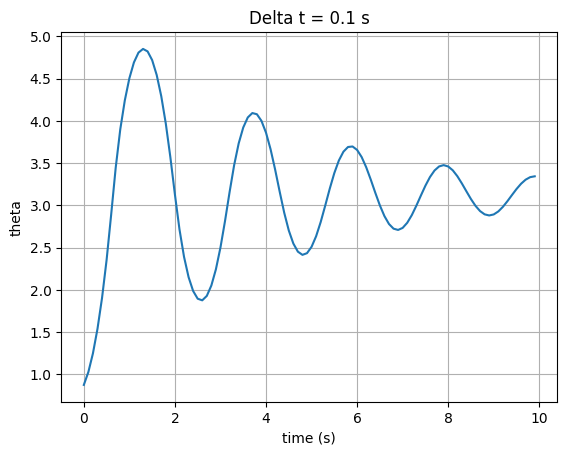

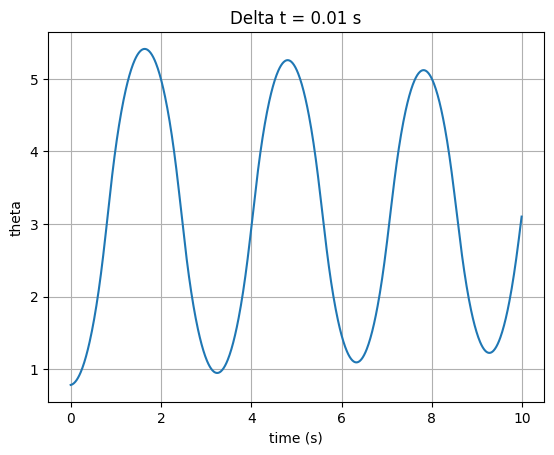

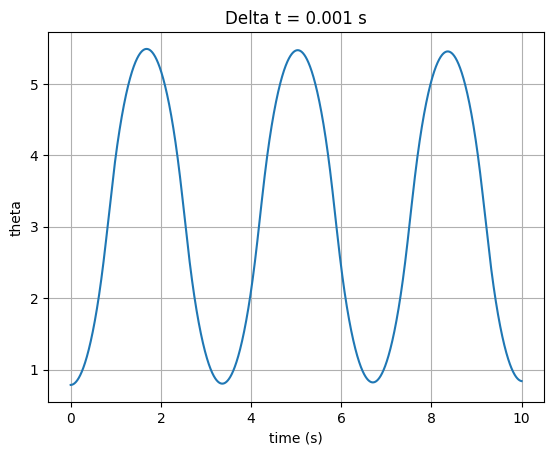

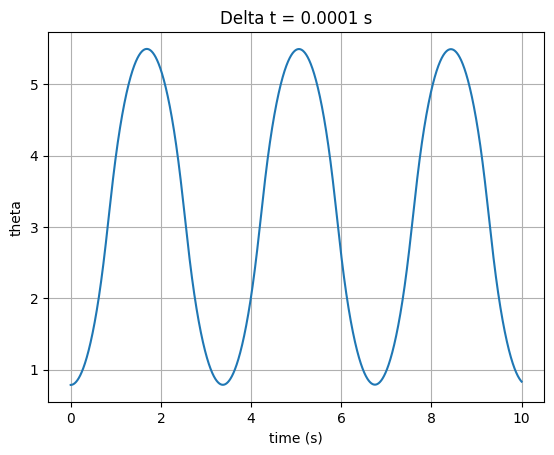

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants

CONSTANTE_M = 2 # Masa del carro
CONSTANTE_m = 1 # Masa de la pertiga
CONSTANTE_l = 1 # Longitud dela pertiga

# Simula el modelo del carro-pendulo.
# Parametros:
#   t_max: tiempo maximo (inicia en 0)
#   delta_t: incremento de tiempo en cada iteracion
#   theta_0: Angulo inicial (grados)
#   v_0: Velocidad angular inicial (radianes/s)
#   a_0: Aceleracion angular inicial (radianes/s2)
def simular(t_max, delta_t, theta_0, v_0, a_0):
  theta = (theta_0 * np.pi) / 180
  v = v_0
  a = a_0

  # Simular
  y = []
  x = np.arange(0, t_max, delta_t)
  for t in x:
    a = calcula_aceleracion(theta, v, 0)
    v = v + a * delta_t
    theta = theta + v * delta_t + a * np.power(delta_t, 2) / 2
    y.append(theta)

  fig, ax = plt.subplots()
  ax.plot(x, y)

  ax.set(xlabel='time (s)', ylabel='theta', title='Delta t = ' + str(delta_t) + " s")
  ax.grid()
  
  plt.show()


# Calcula la aceleracion en el siguiente instante de tiempo dado el angulo y la velocidad angular actual, y la fuerza ejercida
def calcula_aceleracion(theta, v, f):
    numerador = constants.g * np.sin(theta) + np.cos(theta) * ((-f - CONSTANTE_m * CONSTANTE_l * np.power(v, 2) * np.sin(theta)) / (CONSTANTE_M + CONSTANTE_m))
    denominador = CONSTANTE_l * (4/3 - (CONSTANTE_m * np.power(np.cos(theta), 2) / (CONSTANTE_M + CONSTANTE_m)))
    return numerador / denominador


simular(10, 0.1, 45, 0, 0)

simular(10, 0.01, 45, 0, 0)

simular(10, 0.001, 45, 0, 0)

simular(10, 0.0001, 45, 0, 0)